## Jake Finnegan
## Time Series Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')

In [3]:
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


### Time Series Decomposition 1

First, we look at our data and look for any patterns. 

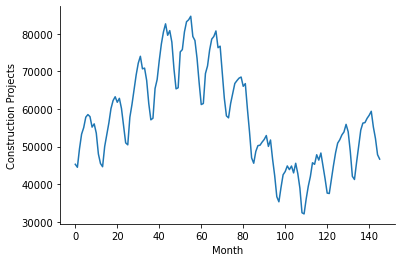

In [4]:
fig,ax = plt.subplots()
ax.plot(df['Private Construction'],label='Private Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Projects')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
Then we add a moving average and perform analysis.

Average Squared Error per Month:  37395667.05489795
     Month Month-Year  Total Construction  Private Construction  \
18      19     Jul-03               82971                 62216   
19      20     Aug-03               85191                 63234   
20      21     Sep-03               83841                 61767   
21      22     Oct-03               83133                 62813   
22      23     Nov-03               77915                 60115   
..     ...        ...                 ...                   ...   
123    124     Apr-12               66223                 44964   
124    125     May-12               72240                 48342   
125    126     Jun-12               77876                 50900   
126    127     Jul-12               78897                 51794   
127    128     Aug-12               81712                 53073   

     Public Construction        MovAvg         sqErr  
18                 20755  57969.430556  1.803335e+07  
19                 21957  58314.9

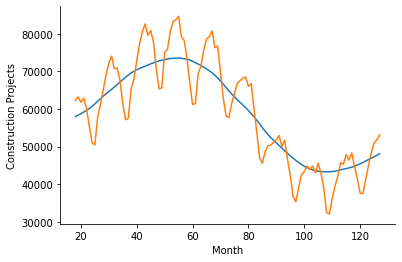

In [5]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2
    
df['MovAvg'] = np.NaN
df['sqErr'] = np.NaN


window = 36
window = window - window % 2

for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvg'] = (0.5*df.iloc[i - int(window/2)]['Private Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Private Construction'])/float(window)

df['sqErr'] = (df['Private Construction'] - df['MovAvg'])**2

df.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df['MovAvg'],label='Moving Avg.')
ax.plot(df['Private Construction'],label='Private Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Projects')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErr'])/len(df))
print(df)

In [6]:
df['R2x'] = df['Private Construction'] - df['MovAvg']
df['R2Errorx'] = abs((df['Private Construction'] - df['R2x'])/df['Private Construction'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R2': '{:,.1f}'.format,
    'R2Errorx': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R2x,R2Errorx
18,19,Jul-03,82971,62216,20755,57969.4,"18,033,352.0",4246.569444,0.932
19,20,Aug-03,85191,63234,21957,58314.9,"24,197,107.6",4919.055556,0.922
20,21,Sep-03,83841,61767,22075,58718.9,"9,290,896.7",3048.097222,0.951
21,22,Oct-03,83133,62813,20321,59143.6,"13,464,822.5",3669.444444,0.942
22,23,Nov-03,77915,60115,17801,59593.5,"271,918.8",521.458333,0.991
23,24,Dec-03,71050,55584,15466,60111.7,"20,500,394.3",-4527.736111,1.081
24,25,Jan-04,64934,50975,13959,60687.3,"94,329,418.8",-9712.333333,1.191
25,26,Feb-04,64138,50449,13689,61335.4,"118,514,067.8",-10886.416667,1.216
26,27,Mar-04,73238,57796,15443,62017.4,"17,820,241.4",-4221.402778,1.073
27,28,Apr-04,78354,61177,17177,62701.1,"2,322,787.7",-1524.069444,1.025


After we find our moving average and R2, we can graph this finding and look for general patterns, as well as find our average residual for Private Construction

Average Residual:  113.25315656565621


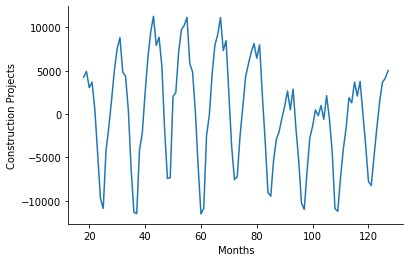

In [7]:
fig,ax = plt.subplots()
ax.plot(df['R2x'])
ax.set_xlabel('Months')
ax.set_ylabel('Construction Projects')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df['R2x'])/len(df))

Next, we perform the same analysis for Public Construction. 

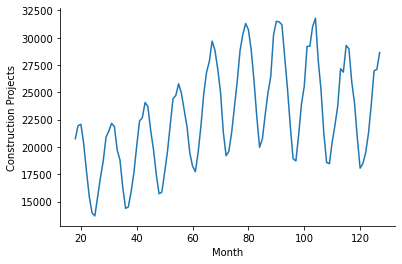

In [8]:
fig,ax = plt.subplots()
ax.plot(df['Public Construction'],label='Public Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Projects')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Average Squared Error per Month:  13581548.10100133
     Month Month-Year  Total Construction  Private Construction  \
18      19     Jul-03               82971                 62216   
19      20     Aug-03               85191                 63234   
20      21     Sep-03               83841                 61767   
21      22     Oct-03               83133                 62813   
22      23     Nov-03               77915                 60115   
..     ...        ...                 ...                   ...   
123    124     Apr-12               66223                 44964   
124    125     May-12               72240                 48342   
125    126     Jun-12               77876                 50900   
126    127     Jul-12               78897                 51794   
127    128     Aug-12               81712                 53073   

     Public Construction        MovAvg         sqErr  
18                 20755  18050.486111  7.314395e+06  
19                 21957  18058.0

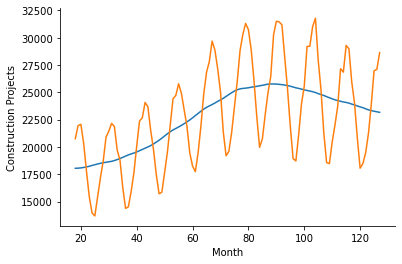

In [9]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2
 
df1 = pd.read_csv('ConstructionTimeSeriesDatav2.csv')    
df1['MovAvg'] = np.NaN
df1['sqErr'] = np.NaN

window = 36
window = window - window % 2

for i in range(int(window/2),df1.shape[0]-int(window/2)):
    df1.loc[df1.index[i],'MovAvg'] = (0.5*df1.iloc[i - int(window/2)]['Public Construction'] + df1.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df1.iloc[i + int(window/2)]['Public Construction'])/float(window)

df1['sqErr'] = (df1['Public Construction'] - df1['MovAvg'])**2

df1.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df1['MovAvg'],label='Moving Avg.')
ax.plot(df1['Public Construction'],label='Public Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Projects')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df1['sqErr'])/len(df1))
print(df1)

In [11]:
df1['R2x'] = df1['Public Construction'] - df1['MovAvg']
df1['R2Errorx'] = abs((df1['Public Construction'] - df1['R2x'])/df1['Public Construction'])
df1.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R2x': '{:,.1f}'.format,
    'R2Errorx': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R2x,R2Errorx
18,19,Jul-03,82971,62216,20755,18050.5,"7,314,395.4","2,704.5",0.870
19,20,Aug-03,85191,63234,21957,18058.0,"15,202,201.0","3,899.0",0.822
20,21,Sep-03,83841,61767,22075,18084.9,"15,920,765.0","3,990.1",0.819
21,22,Oct-03,83133,62813,20321,18126.2,"4,817,354.3","2,194.8",0.892
22,23,Nov-03,77915,60115,17801,18170.0,"136,161.0",-369.0,1.021
23,24,Dec-03,71050,55584,15466,18235.5,"7,670,130.2","-2,769.5",1.179
24,25,Jan-04,64934,50975,13959,18309.2,"18,923,950.0","-4,350.2",1.312
25,26,Feb-04,64138,50449,13689,18377.0,"21,976,953.3","-4,688.0",1.342
26,27,Mar-04,73238,57796,15443,18444.6,"9,009,669.3","-3,001.6",1.194
27,28,Apr-04,78354,61177,17177,18502.0,"1,755,625.0","-1,325.0",1.077


Average Residual:  120.58522727272724


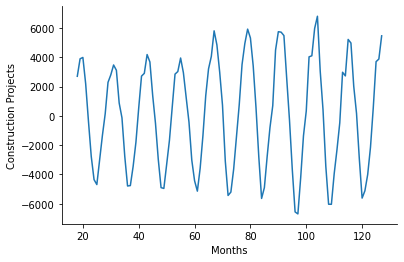

In [12]:
fig,ax = plt.subplots()
ax.plot(df1['R2x'])
ax.set_xlabel('Months')
ax.set_ylabel('Construction Projects')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df1['R2x'])/len(df1))